### Data Analysis and Preprocessing

**Load and Explore the eaach Datasets**

In [27]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Assuming this class is defined in scripts/
from data_preprocessor import FraudDataPreprocessing  

**Initialize the class**

In [28]:
preprocessing=FraudDataPreprocessing()

**Loading the Dataset**

In [29]:
fraud_data,ip_country_data,creditcard_data=preprocessing.load_dataset()

**Display some rows of the each datasets**

In [30]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [31]:
ip_country_data.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [32]:
creditcard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Analysis on Fraud datasets

In [33]:
# Information of the datasets
preprocessing.data_overview(fraud_data)

Number of rows:151112
Number of columns:11
Data types of each column:
user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object


#### Cleaning data

**handling missing values, remove duplicates and convert data types**

In [34]:
# Checking missing values
missign_values=fraud_data.isnull().sum()
print("Missing values for each columns\n")
print(missign_values)
if missign_values.sum()==0:
    print("There are no missing values")
else:
    print(f"There are{missign_values.sum()} missing values")

Missing values for each columns

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
There are no missing values


**Summary:**<br>
   **. Missing values:.** there is no missing values in the fraud dataset<br>
   **. Data types:** the data types of **signup_time** and **purchase_time** are incorrect which must be datetime data type.<br>

***data type conversion of Signup_time and purchase_time and clean duplicate rows***

In [35]:
preprocessing.data_cleaning(fraud_data)

Data type after conversion!

user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object
Number of duplicate rows: 0


***Summary Statistics***

In [36]:
# Summary Statistics of numerical features
fraud_data.describe(include='number')

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [37]:
# Statistical summary of object data features
fraud_data.describe(include='object')

,device_id,source,browser,sex
count,151112,151112,151112,151112
unique,137956,3,5,2
top,CQTUVBYIWWWBC,SEO,Chrome,M
freq,20,60615,61432,88293


#### Exploratory Data Analysis

***Univariate Analysis***

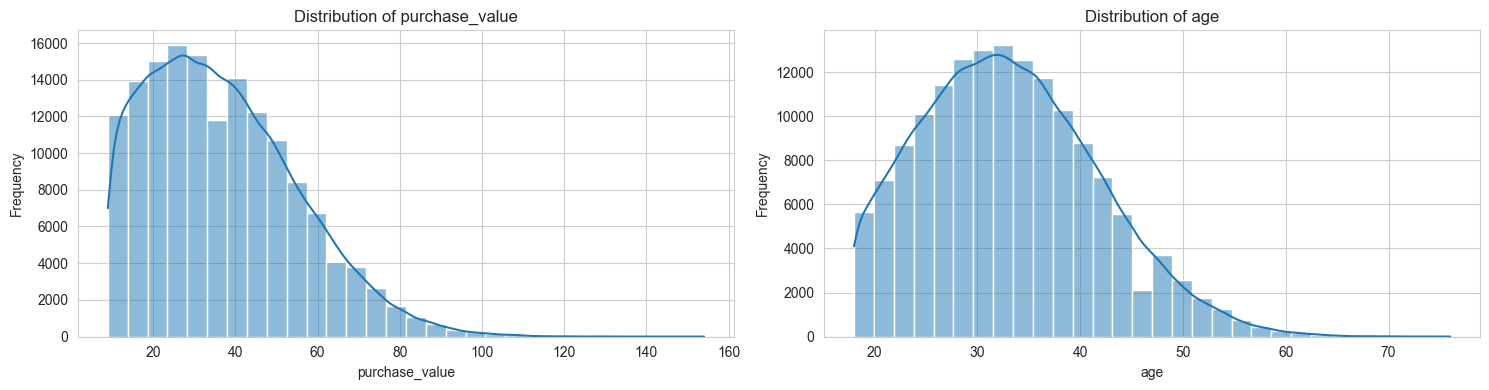

In [38]:
# Import data visualizer tool
from data_visualization import DataVisualization

# Define numerical features
numerical_features = ['purchase_value', 'age']

# Define categorical features
categorical_features = ['source', 'browser', 'sex']

# Create instance of the DataVisualizer(df, target_col)
visualizer = DataVisualization(fraud_data, numerical_features, categorical_features, 'class')


visualizer._plot_numerical_histograms()  # To plot histograms

1. **Distribution of Purchase Value:**
   - The distribution is skewed to the right (positively skewed), with most purchase values concentrated between **10** and **50**.
   - The peak frequency occurs around the **30 to 40** purchase value range, with over **15,000 occurrences**.
   - After **50**, the frequency steadily declines, and very few purchases exceed **100**.
   - This indicates that most purchases are of lower to mid-range values, with high-value purchases being relatively rare. This pattern is typical in consumer behavior where the majority of users spend within a certain range, and big-ticket purchases are less frequent.

2. **Distribution of Age:**
   - The age distribution is also right-skewed, with the highest frequency of users falling between **20 to 30** years old, peaking around **30** years.
   - After **40**, the number of users starts to decline, and very few users are above **60**.
   - This suggests that the user base is predominantly younger, with the bulk of users in the **20-40** age range. This may indicate that the platform or service is more popular among younger adults and less so among older individuals.

### Overall Analysis:
- **Purchase Behavior**: Most users tend to make purchases in the lower to mid-range values, which might be reflective of the product/service pricing or the typical spending capacity of the user base.
- **Demographic Insight**: The majority of the users are in their **20s to 30s**, indicating that marketing strategies or product offerings could be tailored to suit the preferences of younger adults. Given the sharp decline in older age groups, it may also suggest an opportunity for growth or further engagement with older demographics if desired.

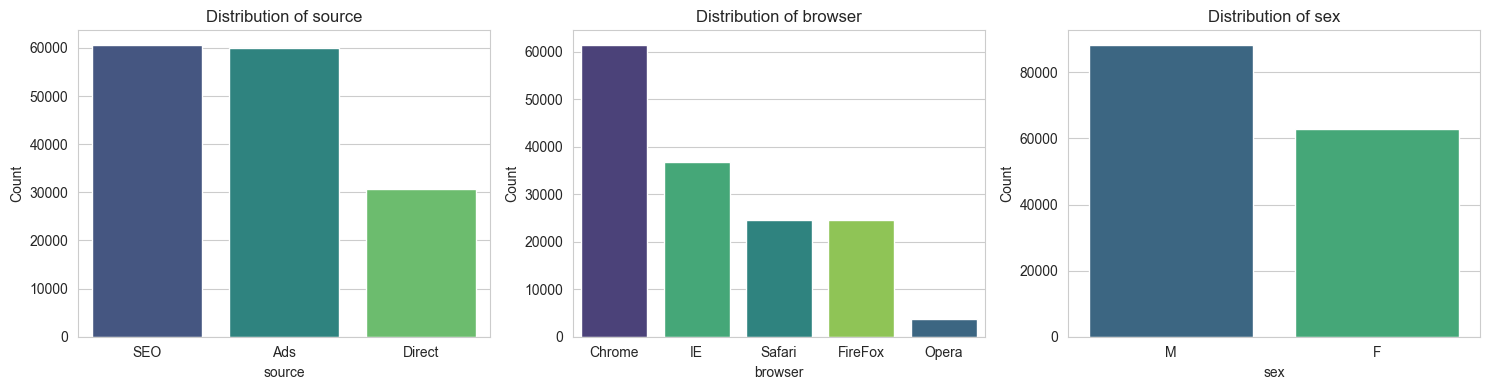

In [39]:
visualizer._plot_categorical()


1. **Distribution of Source:**
   - The three categories for source are "SEO," "Ads," and "Direct."
   - "SEO" and "Ads" sources are almost equally distributed, each contributing to about **60,000 counts**.
   - "Direct" source has a significantly lower count, with approximately **30,000**.
   - This suggests that a large proportion of the traffic or interaction is driven by either search engine optimization (SEO) or advertisements, while direct visits are much less common.

2. **Distribution of Browser:**
   - The browsers represented are "Chrome," "IE," "Safari," "FireFox," and "Opera."
   - "Chrome" is the most popular browser with around **60,000** users, followed by "IE" (Internet Explorer) with a little over **40,000** users.
   - "Safari" and "FireFox" have similar numbers, each with around **30,000** users.
   - "Opera" has the lowest count with a small fraction, likely under **10,000** users.
   - This shows that Chrome dominates browser usage, while legacy browsers like Internet Explorer still have a significant presence. Opera seems to have minimal usage compared to the others.

3. **Distribution of Sex:**
   - The two categories for sex are "M" (Male) and "F" (Female).
   - There are more male users (~**90,000**) than female users (~**70,000**), indicating a gender imbalance in the dataset, with males being the majority.
   - This might suggest that the service, website, or product being analyzed attracts more male users compared to female users.

### Overall Analysis:
- **Traffic Sources**: SEO and Ads are the dominant drivers of user interaction, indicating that marketing strategies involving search engine optimization and advertisements are crucial for reaching a larger audience. Direct visits are much less frequent, so strengthening user loyalty or brand recognition might help increase direct traffic.
- **Browser Preference**: Chrome is the leading browser, with IE also having a significant presence, which suggests that support for older browsers might still be necessary. However, focus should be on modern browsers like Chrome, Safari, and Firefox, as they represent the majority of users.
- **Gender Distribution**: The platform seems to attract more male users, and depending on the nature of the service or product, this could be an important consideration for future marketing or user experience adjustments

***Bivariate Analysis***

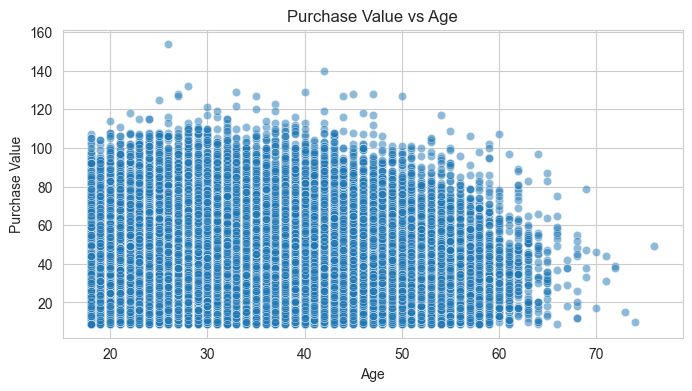

Successfully plotted purchase_value vs age scatter plot.


In [40]:
# Plot relationship between purchase_value vs age
visualizer.plot_relationship()


#### Key Observations:
1. **General Distribution:**
   - The purchase values appear evenly distributed across age groups, particularly for users in their **20s to 50s**, where a wide range of purchase values from around **20** to over **100** is observed.
   - For users in the **60+** age group, both the frequency and the maximum purchase value appear to decrease. There are fewer high-value purchases and fewer users making purchases in general.

2. **Peak Purchase Values:**
   - The purchase values seem to max out at around **150**, with a notable cluster of higher purchase values (above **100**) being more frequent among younger to middle-aged users (from **20 to 50**).
   - After **50**, there is a noticeable reduction in both the number and value of purchases.

3. **Age-Specific Trends:**
   - While younger users (under **30**) make purchases across all value ranges, older users, especially those above **50**, tend to make fewer high-value purchases.
   - There is a subtle decline in the maximum purchase values as age increases, indicating that older users might spend less on average compared to younger users.

#### Conclusion:
- **Age & Spending Behavior**: The data suggests that purchase values do not drastically change with age for users below **50**, but there is a decline in both the volume of purchases and the maximum purchase values for older users. This could indicate that spending habits become more conservative as users age.
- **Target Audience**: The majority of high-value purchases are concentrated among younger and middle-aged users, making them a key target demographic for higher-value products or services.

Plotting categorical variables distributions by class.


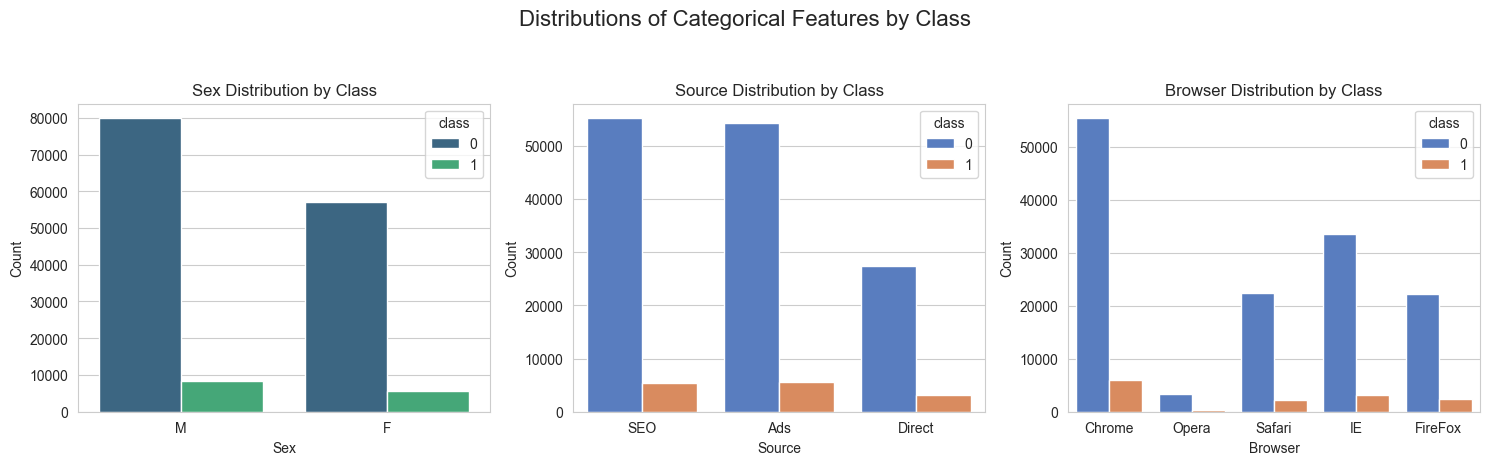

Successfully plotted multiple distributions by class.


In [41]:
# plot the distribution of categorical feature variables by target variable
visualizer.plot_distribution_by_class()

#### Key Observations
**Sex Distribution:**

***Class 0:*** Has a significantly higher number of individuals compared to Class 1.<br>
***Class 1:*** The distribution is relatively balanced between males and females.<br>
**Source Distribution:**<br>

***Class 0:*** The majority of individuals come from organic search (SEO), followed by advertisements and direct traffic.<br>
***Class 1:*** The distribution is more evenly spread across the three sources, with a slight preference for organic search.<br>
**Browser Distribution:**<br>

***Class 0:*** Chrome is the most popular browser, followed by Opera and Safari.<br>
***Class 1:*** Chrome is again the dominant browser, but with a slightly different distribution compared to Class 0.<br>

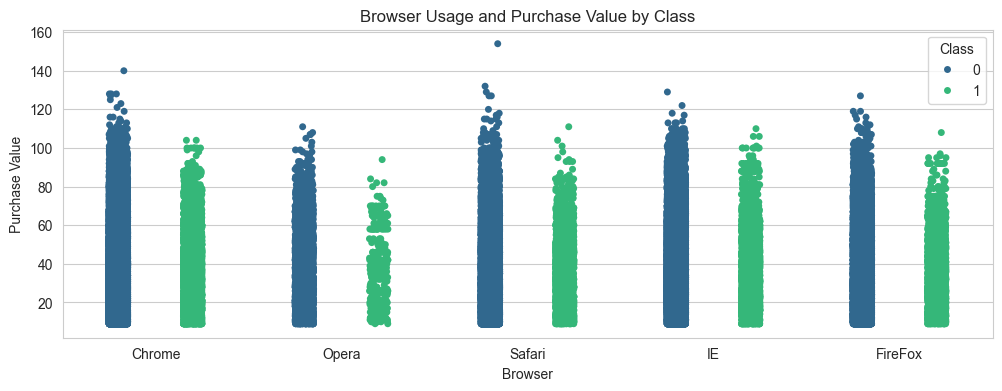

In [42]:
# Browser usage and Purchase value distribution by target variable
visualizer.plot_browser_usage()

#### Key Observations
**Distribution Overlap:** There is a significant overlap in the distributions of purchase values for both classes across all browsers. This suggests that browser usage alone may not be a strong predictor of purchase value.<br>
***Class-Specific Patterns:*** While the overlap is substantial, there might be subtle differences in the distributions for each class:<br><br>
***Chrome:*** Class 0 appears to have a slightly higher concentration of purchase values in the lower range compared to Class 1.<br>
***Safari:*** Class 1 might have a slightly higher proportion of higher-value purchases.<br>
***IE:*** The distributions for both classes seem relatively similar.

### Merge Datasets for Geolocation Analysis

In [43]:
ip_country_data.head(1)

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia


In [44]:
fraud_data.head(1)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,purchase_delay
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,75111.366667


***Convert IP addresses to integer format***

In [45]:
from geolocation import GeolocationDataPreprocessing


gelocation_analyzer=GeolocationDataPreprocessing()

In [46]:
new_fraud_data=fraud_data.copy()

In [47]:
# Convert IP addresses in fraud data to integer format
new_fraud_data['ip_int'] = new_fraud_data['ip_address'].apply(lambda x: gelocation_analyzer.ip_to_int(str(int(x))) if not pd.isna(x) else None)

new_fraud_data.dropna(subset=['ip_int'], inplace=True)

In [48]:
# Convert bounds in the country data to integer
ip_country_data['lower_bound_ip_address'] = ip_country_data['lower_bound_ip_address'].astype(int)
ip_country_data['upper_bound_ip_address'] = ip_country_data['upper_bound_ip_address'].astype(int)

**merge_asof:** <br>
***merges two datasets based on the nearest preceding or succeeding match. It’s often used for "range lookups," and the merge operation assumes that the data is sorted on the key columns being merged.***

In [50]:
# Ensure both columns have the same data type
new_fraud_data['ip_int'] = new_fraud_data['ip_int'].astype('int64')
ip_country_data['lower_bound_ip_address'] = ip_country_data['lower_bound_ip_address'].astype('int64')
ip_country_data['upper_bound_ip_address'] = ip_country_data['upper_bound_ip_address'].astype('int64')

# Sort both datasets for merge_asof
new_fraud_data.sort_values('ip_int', inplace=True)
ip_country_data.sort_values('lower_bound_ip_address', inplace=True)

# Merge the datasets using merge_asof
merged_data_asof = pd.merge_asof(
    new_fraud_data,
    ip_country_data,
    left_on='ip_int',
    right_on='lower_bound_ip_address',
    direction='backward'
)

# Filter rows where ip_int is within the lower and upper bounds
merged_data_asof = merged_data_asof[(merged_data_asof['ip_int'] >= merged_data_asof['lower_bound_ip_address']) &
                                    (merged_data_asof['ip_int'] <= merged_data_asof['upper_bound_ip_address'])]

# Drop unnecessary columns
merged_data_asof.drop(columns=['lower_bound_ip_address', 'upper_bound_ip_address'], inplace=True)

# Save the merged dataframe to a CSV file
merged_data_asof.to_csv('../data/merged_fraud_data.csv', index=False)

# Now display the first few rows of the merged dataset
merged_data_asof.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,purchase_delay,ip_int,country
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,1.677886e+07,0,60536.916667,16778864,Australia
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,1.684205e+07,0,20527.283333,16842045,Thailand
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,1.684366e+07,0,33292.233333,16843656,China
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,1.693873e+07,0,127348.283333,16938732,China
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,1.697198e+07,0,170826.316667,16971984,Thailand




The datasets have been successfully merged using the `merge_asof` approach, with the IP addresses in integer format. Here are the results for the first few rows:

- **IP address**: The integer-converted IP address (`ip_int`).
- **Country**: The corresponding country based on the IP range.

For example:
- IP `16778864` corresponds to **Australia**.
- IP `16842045` corresponds to **Thailand**.

In [51]:
print(merged_data_asof.dtypes)

user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
purchase_delay           float64
ip_int                     int64
country                   object
dtype: object


<Figure size 1400x700 with 0 Axes>

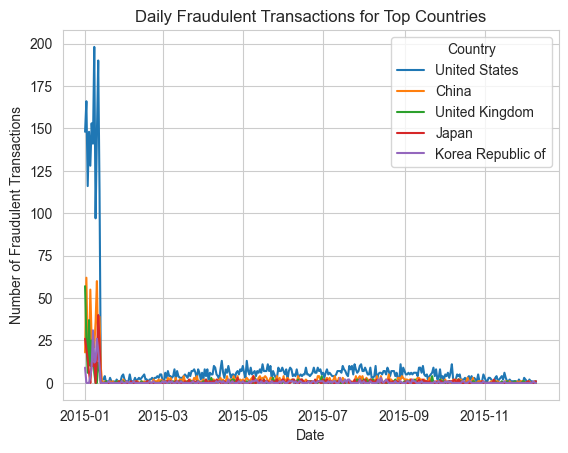

In [52]:

# Group fraudulent transactions by day and country
daily_fraud = merged_data_asof[merged_data_asof['class'] == 1].groupby([merged_data_asof['purchase_time'].dt.date, 'country']).size().unstack().fillna(0)

# Determine the top countries with the highest number of fraudulent transactions
top_countries = daily_fraud.sum().nlargest(5).index

# Plotting fraud trends over time for the top countries
plt.figure(figsize=(14, 7))
daily_fraud[top_countries].plot()
plt.title('Daily Fraudulent Transactions for Top Countries')
plt.xlabel('Date')
plt.ylabel('Number of Fraudulent Transactions')
plt.legend(title='Country')
plt.show()

The graph titled "Daily Fraudulent Transactions for Top Countries" shows the number of daily fraudulent transactions across several countries for the year 2015. Here’s a summary of key observations:

1. **United States**: The highest number of fraudulent transactions, particularly at the start of 2015. There’s a sharp decline after January, followed by consistent, lower levels of fraudulent activity for the remainder of the year.
   
2. **China, Japan, United Kingdom, and Korea Republic**: These countries exhibit much lower levels of fraudulent activity compared to the United States. While there are noticeable spikes early in the year (January), fraudulent transactions in these countries stabilize to near-zero levels as the year progresses.

3. **Trend**: Across all countries, fraudulent transactions are highly concentrated at the start of 2015, with a dramatic drop after January. The data suggests that a large volume of fraud was detected early on, with fewer incidents recorded in later months.

The graph highlights how the bulk of fraudulent transactions were concentrated in the United States and that the number of such incidents sharply decreased after the beginning of the year. Other countries remained relatively low in fraudulent activities throughout.

#### Feature Engineering

***Normalization and Scaling***

In [53]:
from feature_engineering import DataFeatureEngineering

In [54]:
feature_engineering=DataFeatureEngineering()

In [55]:
merged_data=feature_engineering.feature_engineering(merged_data_asof)
merged_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,purchase_delay,ip_int,country,transaction_count,hour_of_day,day_of_week
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,1.677886e+07,0,60536.916667,16778864,Australia,1,3,6
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,1.684205e+07,0,20527.283333,16842045,Thailand,1,20,2
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,1.684366e+07,0,33292.233333,16843656,China,1,23,5
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,1.693873e+07,0,127348.283333,16938732,China,1,16,5
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,1.697198e+07,0,170826.316667,16971984,Thailand,1,4,1


In [56]:
merged_data=feature_engineering.normalize_scale_features(merged_data)
merged_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,purchase_delay,ip_int,country,transaction_count,hour_of_day,day_of_week
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,0.546375,KIXYSVCHIPQBR,SEO,Safari,F,30,1.677886e+07,0,60536.916667,16778864,Australia,0.0,3,6
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,-1.193991,PKYOWQKWGJNJI,SEO,Chrome,F,34,1.684205e+07,0,20527.283333,16842045,Thailand,0.0,20,2
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,0.383216,LVCSXLISZHVUO,Ads,IE,M,29,1.684366e+07,0,33292.233333,16843656,China,0.0,23,5
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,0.981467,UHAUHNXXUADJE,Direct,Chrome,F,30,1.693873e+07,0,127348.283333,16938732,China,0.0,16,5
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,0.763921,XPGPMOHIDRMGE,SEO,Chrome,F,37,1.697198e+07,0,170826.316667,16971984,Thailand,0.0,4,1


***Encode Categorical Features***

**One-Hot Encoding**

In [57]:
merged_data=feature_engineering.one_hot_encode(merged_data)
merged_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,purchase_delay,ip_int,country,transaction_count,hour_of_day,day_of_week,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,0.546375,KIXYSVCHIPQBR,30,1.677886e+07,0,60536.916667,16778864,Australia,0.0,3,6,0,0,1,0,0,0,0,1,1,0
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,-1.193991,PKYOWQKWGJNJI,34,1.684205e+07,0,20527.283333,16842045,Thailand,0.0,20,2,0,0,1,1,0,0,0,0,1,0
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,0.383216,LVCSXLISZHVUO,29,1.684366e+07,0,33292.233333,16843656,China,0.0,23,5,1,0,0,0,0,1,0,0,0,1
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,0.981467,UHAUHNXXUADJE,30,1.693873e+07,0,127348.283333,16938732,China,0.0,16,5,0,1,0,1,0,0,0,0,1,0
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,0.763921,XPGPMOHIDRMGE,37,1.697198e+07,0,170826.316667,16971984,Thailand,0.0,4,1,0,0,1,1,0,0,0,0,1,0


#### Frequency Encoding

In [58]:
merged_data=feature_engineering.frequency_encode_country(merged_data)
merged_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,purchase_delay,ip_int,transaction_count,hour_of_day,day_of_week,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M,country_encoded
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,0.546375,KIXYSVCHIPQBR,30,1.677886e+07,0,60536.916667,16778864,0.0,3,6,0,0,1,0,0,0,0,1,1,0,0.012555
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,-1.193991,PKYOWQKWGJNJI,34,1.684205e+07,0,20527.283333,16842045,0.0,20,2,0,0,1,1,0,0,0,0,1,0,0.002218
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,0.383216,LVCSXLISZHVUO,29,1.684366e+07,0,33292.233333,16843656,0.0,23,5,1,0,0,0,0,1,0,0,0,1,0.116614
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,0.981467,UHAUHNXXUADJE,30,1.693873e+07,0,127348.283333,16938732,0.0,16,5,0,1,0,1,0,0,0,0,1,0,0.116614
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,0.763921,XPGPMOHIDRMGE,37,1.697198e+07,0,170826.316667,16971984,0.0,4,1,0,0,1,1,0,0,0,0,1,0,0.002218


In [59]:
# save the processed DataFrame
merged_data.to_csv('../data/processed_fraud_data.csv')